<a href="https://colab.research.google.com/github/vickdurazzo/visualizacao_dados_python/blob/main/Visualizacao_dados04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalhando com Dados Financeiros**

In [1]:
!pip install cufflinks
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install chart_studio
import cufflinks as cf
import plotly
from plotly.offline import iplot
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
plotly.offline.init_notebook_mode(connected=True)
cf.go_offline()


# Definindo o renderizador:
import plotly.io as pio
pio.renderers.default = 'colab'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

In [7]:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


**Plotando preços de fechamento da ação AAPL (apple)**

In [5]:
data = [go.Scatter(
          x=df.Date,
          y=df['AAPL.Close'])]

data_obj = go.Figure(data = data) 

pio.show(data_obj)

**Customizando Faixas de Eixos (Range)**

In [6]:
trace_high = go.Scatter(
                x=df.Date,
                y=df['AAPL.High'],
                name = "AAPL High",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=df.Date,
                y=df['AAPL.Low'],
                name = "AAPL Low",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = go.Layout(
    title = "Faixa de Data Customizada",
    xaxis = dict(
        range = ['2016-07-01','2016-12-31'])
)

fig = go.Figure(data = data, layout = layout)
pio.show(fig, filename = "Manually Set Range")

**Rangeslider e Rangeselector**

In [8]:
data = [trace_high,trace_low]

layout = go.Layout(
    title="Série com Rangeslider e Botoes",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = go.Figure(data=data, layout=layout)
pio.show(fig)

**Trabalhando com Candelstick**
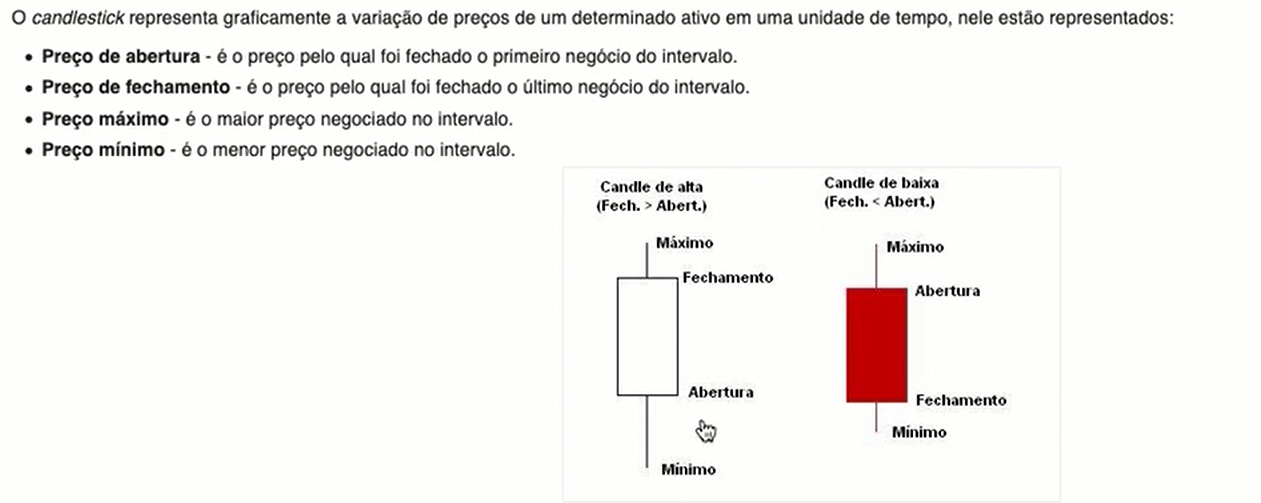

In [9]:
trace = go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])

data = go.Figure(trace)
pio.show(data, filename='simple_candlestick')

**Customizando Candelstick**

In [10]:
trace = go.Candlestick(
    x=df['Date'],
    open=df['AAPL.Open'],
    high=df['AAPL.High'],
    low=df['AAPL.Low'],
    close=df['AAPL.Close'],
    increasing=dict(line=dict(color= '#17BECF')),
    decreasing=dict(line=dict(color= '#7F7F7F'))
)
data = [trace]

data_obj = go.Figure(data)
pio.show(data_obj, filename='styled_candlestick')

**Inserindo Anotações**

In [12]:
trace = go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])
data = [trace]

layout = {
    'title': 'Apple Preços no Periodo',
    'yaxis': {'title': 'AAPL Stock'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 2}
    }],
    'annotations': [{
        'x': '2016-12-09', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Inicio do ciclo de alta'
    }]
}
fig = go.Figure(data=data, layout=layout)
pio.show(fig)